**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [6]:
params={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [8]:
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(rf,param_grid=params,verbose=2)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [9]:
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.6s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] .

[CV] .................... max_depth=9, n_estimators=200, total=  13.0s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.9s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.7s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   0.8s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] .................... max_depth=12, n_estimators=50, total=   3.9s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                    

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [11]:
gridsearch_result=pd.DataFrame(gridsearch.cv_results_)
gridsearch_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318041,0.107949,0.017084,0.017862,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.814390,0.819269,0.816925,0.824426,0.815284,0.818058,0.003590,12
1,1.233375,0.178758,0.033606,0.006489,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812046,0.815284,0.814346,0.820206,0.813408,0.815058,0.002788,15
2,2.684119,0.106974,0.068289,0.004826,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810640,0.812705,0.813408,0.819269,0.810830,0.813370,0.003135,16
3,4.980303,0.327837,0.128319,0.011489,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811812,0.815752,0.814346,0.821378,0.813408,0.815339,0.003280,14
4,0.389956,0.014016,0.008947,0.000902,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814390,0.817159,0.819972,0.826301,0.819503,0.819465,0.003951,10
5,2.313461,0.174775,0.053185,0.010967,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815327,0.819503,0.819737,0.826067,0.819972,0.820121,0.003432,7
6,4.654555,0.206511,0.093292,0.014719,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815796,0.819737,0.819503,0.826535,0.820675,0.820449,0.003468,4
7,9.178290,0.467034,0.172765,0.024325,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815561,0.819972,0.819269,0.826770,0.820441,0.820402,0.003618,6
8,0.678757,0.045059,0.013944,0.002465,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.811577,0.815987,0.819737,0.824895,0.818800,0.818199,0.004389,11
9,3.183032,0.113049,0.059882,0.006907,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.817202,0.818800,0.819503,0.827239,0.820441,0.820637,0.003466,3


**Find the best hyperparameters from the cross-validation.**

In [14]:
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [31]:
# Create a 5x5 grid
mean_score=gridsearch_result['mean_test_score'].to_numpy()
mean_score=np.reshape(mean_score,(4,4))
xx_example, yy_example = np.meshgrid(range(5), range(5))
mean_score.shape

(4, 4)

In [32]:
# Set color map to `plt.cm.jet`
cmp=plt.cm.jet

Text(0, 0.5, 'Y coordinate')

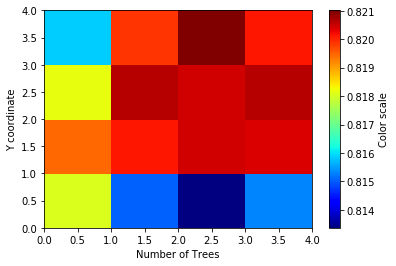

In [34]:
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example,yy_example,mean_score,cmap=cmp)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [40]:
# Create a dataframe of the feature names and importance
featuresdf=pd.DataFrame({
    'Feature Name':features_response[:-1],
    'Importance':gridsearch.best_estimator_.feature_importances_
})

In [41]:
# Sort values by importance
featuresdf.sort_values('Importance',ascending=False)

,Feature Name,Importance
4,PAY_1,0.299643
11,PAY_AMT1,0.061250
0,LIMIT_BAL,0.059768
5,BILL_AMT1,0.055508
6,BILL_AMT2,0.052556
12,PAY_AMT2,0.051675
7,BILL_AMT3,0.047922
8,BILL_AMT4,0.047489
13,PAY_AMT3,0.047361
9,BILL_AMT5,0.045074
